<a href="https://colab.research.google.com/github/raulFuzita/cct-4-year/blob/psi-final-project/problem_solving_for_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Solving for Industry

Lecturer: Dr. Muhammad Iqbal

Students Information

David Silva - 2018264

Luiz Augusto Dias - 2018429

Raul Macedo Fuzita - 2018337

# Exploratory Data Analysis (EDA)

In [155]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [156]:
df = pd.read_csv('https://raw.githubusercontent.com/raulFuzita/cct-4-year/psi-final-project/data/daft_ie_v1_correct_coordinates.csv')

The Daft dataset from 2021 to 2022 has 3967 records and 22 columns in the total.

In [157]:
df.shape

(3967, 24)

See below the name of the columns. Some names are not quite clear what they are. We may consider renaming some of the columns to give more meaning to each attribute.

In [158]:
df.columns

Index(['CODE', 'ADDRESS', 'featuredLevel', 'publishDate', 'price',
       'numBedrooms', 'numBathrooms', 'propertyType', 'propertySize',
       'category', 'AMV_price', 'sellerId', 'seller_name', 'seller_branch',
       'sellerType', 'm_totalImages', 'm_hasVideo', 'm_hasVirtualTour',
       'm_hasBrochure', 'ber_rating', 'longitude', 'latitude', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

The `info` method gives us a glimpse of what type each attribute is. By looking at the name and the type of some of the attributes we begin to see attributes that might not be useful for our analysis or to train the model later.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODE              3967 non-null   int64  
 1   ADDRESS           3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


The `describe` method gives a quick overview of numerical attributes. The max value of bedrooms and bathrooms reveals a strange number of 23. It looks too high for a property if it is not a building, mansion, etc. Another interesting value is the min of longitude which is -100.445882. A quick search on the internet we learn that longitude will not be smaller than -5 degrees and higher than -11 (Data.gov.ie, 2022). The min for property size is 1m² which does not sound right.


In [160]:
df.describe()

,CODE,price,numBedrooms,numBathrooms,propertySize,AMV_price,sellerId,m_totalImages,longitude,latitude,LONGITUDE,LATITUDE
count,3.967000e+03,3.967000e+03,3967.000000,3967.000000,3612.000000,3967.000000,3.967000e+03,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,3.629047e+06,3.416734e+05,3.126292,2.077136,132.673865,0.047391,2.163815e+04,18.448954,-7.389964,53.133816,-7.431045,53.099834
std,2.502479e+05,2.703582e+05,1.230570,1.167772,295.246580,0.212500,2.541506e+05,10.537226,1.865587,0.716435,2.907545,1.424622
min,1.092100e+04,2.000000e+04,1.000000,1.000000,1.000000,0.000000,7.000000e+00,0.000000,-100.445882,39.783730,-117.669070,0.000000
25%,3.654066e+06,1.950000e+05,2.000000,1.000000,78.000000,0.000000,2.178000e+03,12.000000,-8.426627,52.666116,-8.432554,52.664233
50%,3.673795e+06,2.750000e+05,3.000000,2.000000,103.000000,0.000000,3.255000e+03,17.000000,-7.050391,53.303346,-7.040067,53.303102
75%,3.685990e+06,3.950000e+05,4.000000,3.000000,137.000000,0.000000,8.806000e+03,23.000000,-6.298945,53.438722,-6.303485,53.434679
max,3.695402e+06,4.500000e+06,23.000000,23.000000,8600.000000,1.000000,5.310328e+06,104.000000,-6.028016,55.299693,0.000000,55.294928


The next step is to show the five first rows (records) of the dataset. With the first five rows, the title content is revealed, and the publish date as well. The title is the properties' addresses and publishes date is in the format of `YYYY-mm-dd`.

In [161]:
df.head()

,CODE,ADDRESS,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude,LONGITUDE,LATITUDE
0,3626025,"11 Chestnut Cres, Bridgemount, Carrigaline, Co...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940,-8.382505,51.822938
1,3675175,"58 The Glen, Bracklone, Portarlington, Co. Lao...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465,-7.180640,53.156985
2,3673450,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493,-6.342353,53.269333
3,3649708,"31 Lissanálta Dr, Sluggary, Dooradoyle, Co. Li...",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588,-8.640693,52.629593
4,3643947,"5 St Columbas Terrace, Kilballivor, Ballivor, ...",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601,-6.964963,53.531063


According to the description of the dataset available on Kaggle, the attribute category has two values, 'buy' and 'new homes'. It does not make clear if a buy value is a property already bought or already sold. This attribute will not be necessary for our analysis and training model. See the attribute described below.

category: ['Buy' 'New Homes'] (Buy means the houses listed under Buy menu in the websites)

The method called unique will show if this attribute in fact has only two categories.

In [162]:
df['category'].unique()

array(['Buy', 'New Homes'], dtype=object)

AMVprice: Advised minimum value (some properties have AMV price. The price column was mixed with regular price and AMV price, created a new column for AMV price to flag if it is AMV or not.)

Python provides a method called value_counts that returns the number of frequency of each value in the dataset. 188 out of 3779 records are estimated prices.

In [163]:
df['AMV_price'].value_counts()

0    3779
1     188
Name: AMV_price, dtype: int64

**See below the description of some attributes we will analyse next.**

sellerId: Seller's Id

sellername: Seller's name

sellerbranch: Seller's branch if it is an agency.

sellerType: ['BRANDEDAGENT' 'UNBRANDEDAGENT' 'PRIVATEUSER']

m_totalImages: Total images posted on the website.

m_hasVideo: Whether the property posted a video or not.

m_hasVirtualTour: Whether the property has a virtual tour or not.

m_hasBrochure: Whether the property has a brochure or not.

ber_rating: ['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI666' 'F' 'E2' 'B2' 'XXX', 'A2,''B1' 'A1' 'A1A2']
(XXX means the rating was missing)

We have 169 missing rate values

In [164]:
df[df['ber_rating'] == 'XXX'].shape[0]

169

In the separated analysis we realise the longitude and latitude coordinates are not correct. Attribute `id` is represented by `CODE`.

## Cleanig Dataset

After our analysis we came to conclusion that we do not need the CODE (id), featured level, category, AMV price, seller id, seller name, seller branch, seller type, total images, videos, virtual tour, brochure and rating to train the model.

Now we can select them and drop from the dataset.


In [165]:
delete_columns = ['CODE','featuredLevel', 'category', 'AMV_price','sellerId', 'seller_name', 'seller_branch', 'sellerType', 'm_totalImages', 'm_hasVideo', 'm_hasVirtualTour', 'm_hasBrochure', 'ber_rating']
df.drop(delete_columns, axis=1, inplace=True)

We have also to remove the attributes of `longitude` and `latitude` from our dataset. As we discussed before, they have incorrect coordinates. Thus, we no longer need them, and we can replace them with attributes with the same name written in capital letters.

In [166]:
delete_columns = ['longitude',	'latitude']
df.drop(delete_columns, axis=1, inplace=True)

To complete our replacement, we can rename the attributes written in capital letters to lower case for the sake of simplicity.

We will not rename the other attributes yet. First of all, we have to understand our dataset to give the columns a suitable name.

In [167]:
rename_columns = {'LONGITUDE': 'longitude', 'LATITUDE': 'latitude'}
df.rename(columns=rename_columns, inplace=True)
df.columns

Index(['ADDRESS', 'publishDate', 'price', 'numBedrooms', 'numBathrooms',
       'propertyType', 'propertySize', 'longitude', 'latitude'],
      dtype='object')

We have a much cleaner dataset by dropping those columns (attributes). However, there is a lot to do yet.

In [168]:
df.head()

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude
0,"11 Chestnut Cres, Bridgemount, Carrigaline, Co...",2022-01-28,290000,3,3,End of Terrace,96.0,-8.382505,51.822938
1,"58 The Glen, Bracklone, Portarlington, Co. Lao...",2022-01-28,225000,3,2,Semi-D,93.0,-7.180640,53.156985
2,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",2022-01-27,575000,4,3,Semi-D,162.0,-6.342353,53.269333
3,"31 Lissanálta Dr, Sluggary, Dooradoyle, Co. Li...",2022-01-28,299000,3,3,Semi-D,NaN,-8.640693,52.629593
4,"5 St Columbas Terrace, Kilballivor, Ballivor, ...",2022-01-28,120000,3,1,Terrace,68.0,-6.964963,53.531063


The next step is to detect whether there is any NaN value in the dataset. Notice that there are 355 records that contain NaN values.

In [169]:
df.isnull().sum()

ADDRESS           0
publishDate       0
price             0
numBedrooms       0
numBathrooms      0
propertyType      0
propertySize    355
longitude         0
latitude          0
dtype: int64

Pandas dropna method removes all the NaN values

In [170]:
df.dropna(inplace=True)
df.isnull().sum()

ADDRESS         0
publishDate     0
price           0
numBedrooms     0
numBathrooms    0
propertyType    0
propertySize    0
longitude       0
latitude        0
dtype: int64

We can also look for duplicate values in the dataset. And as we can see below there are some duplicated values in it.

In [171]:
df.duplicated().sum()

3

Python pandas package offers a method called `drop_duplicates` that easily removes any duplicate values.

In [172]:
df.drop_duplicates(inplace = True)

When we check for duplicated value they no longer are in our dataset.

In [173]:
df.duplicated().sum()

0

Previously, we learned that the maritime limits in the Irish territorial sea do not exceed -11 degrees for longitude and a property smaller than 20 meters could be an outlier. That might have been a shed or something like that.

In [174]:
df.loc[df['longitude'] < -11.000000, 'longitude'] = np.nan
df.loc[df['propertySize'] < 20, 'propertySize'] = np.nan
df.dropna(inplace=True)
df.describe()

,price,numBedrooms,numBathrooms,propertySize,longitude,latitude
count,3.600000e+03,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,3.474183e+05,3.121389,2.076667,132.930556,-7.330053,53.097073
std,2.730490e+05,1.191798,1.119039,295.683122,1.149214,1.425417
min,2.000000e+04,1.000000,1.000000,31.000000,-10.328275,0.000000
25%,1.990000e+05,2.000000,1.000000,78.000000,-8.400057,52.666248
50%,2.800000e+05,3.000000,2.000000,103.000000,-6.951842,53.300061
75%,3.950000e+05,4.000000,3.000000,137.000000,-6.295140,53.423553
max,4.500000e+06,16.000000,13.000000,8600.000000,0.000000,55.294928


When we analysed the description of the dataset, there were properties with more than 10. We can filter all data higher than 10 bedrooms and then conduct research to find out whether this data represent outliers.

The result shows there is a property that has 16 bedrooms built in an area of 67m². Would it be possible?

In [175]:
df[df['numBedrooms'] > 10]

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude
113,"Dungarvan, Co. Waterford, Ireland",2022-01-24,650000,13,13,Detached,557.0,-7.620363,52.093676
394,"Kilmore Lower, Co. Cavan, Ireland",2022-01-28,900000,16,4,Detached,67.0,-7.423140,53.989965
404,"1 Gulladoo Village, Cornaferst, Carrigallen, C...",2022-01-28,695000,16,10,Detached,648.0,-7.628445,53.946525
3070,"Firmount House, Firmount Demesne, Clane, Co. K...",2022-01-30,1600000,14,9,Detached,1208.0,-6.709118,53.280750
3143,"Lake Road, Eightercua, Waterville, Co. Kerry, ...",2022-01-11,795000,12,13,Detached,641.0,-10.143460,51.815346


We can find the description of that property on <a href="https://www.daft.ie/for-sale/detached-house-kilmore-lower-cavan-co-cavan/3619102">(Daft.ie, 2022)</a>. According to the description it has approximately 16.5 acres which are 66773.19m². It does not say what is the size of the living area. We can also search for this property on Google Earth and try to take an estimated area. 

<img src='https://github.com/raulFuzita/cct-4-year/blob/psi-final-project/misc/images/property.png?raw=true' alt='Property address: Kilmore Lower, Cavan, Co. Cavan'/>

In the image above we can see, that there is another built area at the back of the house. The estimated area for the house is approximately 185m² and a perimeter approximately of 59. It is not clear if it is meant to be 66773.19m² from 16.5 acres or if it is the sum of the house perimeter and what looks like a shed in the back.

Either way, the data is inconclusive, so the best way is to remove it.

In [176]:
df[df.index == 404] = np.nan
df.dropna(inplace=True)
df[df['numBedrooms'] > 10]

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude
113,"Dungarvan, Co. Waterford, Ireland",2022-01-24,650000.0,13.0,13.0,Detached,557.0,-7.620363,52.093676
394,"Kilmore Lower, Co. Cavan, Ireland",2022-01-28,900000.0,16.0,4.0,Detached,67.0,-7.423140,53.989965
3070,"Firmount House, Firmount Demesne, Clane, Co. K...",2022-01-30,1600000.0,14.0,9.0,Detached,1208.0,-6.709118,53.280750
3143,"Lake Road, Eightercua, Waterville, Co. Kerry, ...",2022-01-11,795000.0,12.0,13.0,Detached,641.0,-10.143460,51.815346


## Preparing Dataset

### Categorical Data

An important consideration to take is how we handle categorical data. To train a regression model we have to encode categorical data into a numerical representation. See the values of property type attribute.

In [177]:
print('Property Type:', df['propertyType'].unique())

Property Type: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']


We will create a new attribute called encoded_propertyType to store the encoded values from attribuet property type.

In [178]:
le = LabelEncoder()

df['encoded_propertyType'] = le.fit_transform(df['propertyType'])
print('Property Type:', df['propertyType'].unique())
print('Encoded Type:', df['encoded_propertyType'].unique())

Property Type: ['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']
Encoded Type: [ 4  6  9  2  0  1 10  3  7  8  5]


In [179]:
df.head()

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType
0,"11 Chestnut Cres, Bridgemount, Carrigaline, Co...",2022-01-28,290000.0,3.0,3.0,End of Terrace,96.0,-8.382505,51.822938,4
1,"58 The Glen, Bracklone, Portarlington, Co. Lao...",2022-01-28,225000.0,3.0,2.0,Semi-D,93.0,-7.180640,53.156985,6
2,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",2022-01-27,575000.0,4.0,3.0,Semi-D,162.0,-6.342353,53.269333,6
4,"5 St Columbas Terrace, Kilballivor, Ballivor, ...",2022-01-28,120000.0,3.0,1.0,Terrace,68.0,-6.964963,53.531063,9
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000.0,4.0,3.0,Semi-D,113.0,-8.614790,51.883611,6


Publish date attribute is also categorical data, although numbers represent it. We will handle publish dates differently in this case. We can convert them to ordinal date. The result of the conversion will be stored in the ordinal_date attribute.

In [180]:
df['ordinal_date'] = pd.to_datetime(df['publishDate'])
df['ordinal_date']=df['ordinal_date'].map(dt.datetime.toordinal)
df.head()

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType,ordinal_date
0,"11 Chestnut Cres, Bridgemount, Carrigaline, Co...",2022-01-28,290000.0,3.0,3.0,End of Terrace,96.0,-8.382505,51.822938,4,738183
1,"58 The Glen, Bracklone, Portarlington, Co. Lao...",2022-01-28,225000.0,3.0,2.0,Semi-D,93.0,-7.180640,53.156985,6,738183
2,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",2022-01-27,575000.0,4.0,3.0,Semi-D,162.0,-6.342353,53.269333,6,738182
4,"5 St Columbas Terrace, Kilballivor, Ballivor, ...",2022-01-28,120000.0,3.0,1.0,Terrace,68.0,-6.964963,53.531063,9,738183
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000.0,4.0,3.0,Semi-D,113.0,-8.614790,51.883611,6,738185


Since train, a model requires many tests and replacements to help tune and find the best model for our prediction is good to have another column to represent only the year.

In [181]:
df['year'] = pd.to_datetime(df['publishDate'])
df['year'].values.astype('datetime64[Y]')
df['year'] = pd.DatetimeIndex(df['year']).year
df.head()

,ADDRESS,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,longitude,latitude,encoded_propertyType,ordinal_date,year
0,"11 Chestnut Cres, Bridgemount, Carrigaline, Co...",2022-01-28,290000.0,3.0,3.0,End of Terrace,96.0,-8.382505,51.822938,4,738183,2022
1,"58 The Glen, Bracklone, Portarlington, Co. Lao...",2022-01-28,225000.0,3.0,2.0,Semi-D,93.0,-7.180640,53.156985,6,738183,2022
2,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",2022-01-27,575000.0,4.0,3.0,Semi-D,162.0,-6.342353,53.269333,6,738182,2022
4,"5 St Columbas Terrace, Kilballivor, Ballivor, ...",2022-01-28,120000.0,3.0,1.0,Terrace,68.0,-6.964963,53.531063,9,738183,2022
5,"75 The Lawn, Coolroe Meadows, Ballincollig, Co...",2022-01-30,400000.0,4.0,3.0,Semi-D,113.0,-8.614790,51.883611,6,738185,2022


At the beginning of our analysis, we commented that some of the column names were unclear about what they represent or the name is not in a standard we will need later to use our model.

In [182]:
rename_columns = {'ADDRESS': 'address', 'price': 'sale_price', 'numBedrooms': 'bedrooms', 'numBathrooms': 'bathrooms', 'propertySize': 'property_size', 'encoded_propertyType': 'property_type'}
df.rename(columns=rename_columns, inplace=True)
df.columns

Index(['address', 'publishDate', 'sale_price', 'bedrooms', 'bathrooms',
       'propertyType', 'property_size', 'longitude', 'latitude',
       'property_type', 'ordinal_date', 'year'],
      dtype='object')

We will not need any categorical data to train the model from this point on. We can remove the columns publish date and property type.

In [183]:
df.drop(['publishDate', 'propertyType'], axis=1, inplace=True)
df.columns

Index(['address', 'sale_price', 'bedrooms', 'bathrooms', 'property_size',
       'longitude', 'latitude', 'property_type', 'ordinal_date', 'year'],
      dtype='object')

For our project, we decided to train a model to predict and estimate prices for properties in Dublin. That being said, we do not need data from anywhere else.

In [184]:
dublin = df[df['address'].str.contains('Dublin')]
dublin.head()

,address,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,ordinal_date,year
2,"16 Dodderbrook Ave., Oldcourt, Dublin, D24 E2Y...",575000.0,4.0,3.0,162.0,-6.342353,53.269333,6,738182,2022
10,"Apartment 27, The Oaks, River Rd, Pelletstown ...",320000.0,2.0,2.0,70.0,-6.323467,53.377174,0,738181,2022
12,"The Haven, 1 Cherryfield Walk, Hartstown, Dubl...",275000.0,2.0,1.0,58.0,-6.421760,53.395524,6,738183,2022
14,"1a, Sacre Coeur, 11 Cedarwood Green, Ballymun,...",490000.0,3.0,3.0,108.0,-6.283468,53.396182,2,738185,2022
15,"Seamount Rd, Seamount Dr, Malahide, Co. Dublin...",625000.0,3.0,3.0,95.0,-6.148709,53.443758,9,738166,2022


Once we have a new data frame with only records from Dublin, we can filter and keep only numerical data for the model.

In [185]:
keep_columns = ['sale_price', 'bedrooms', 'bathrooms', 'property_size', 'longitude', 'latitude', 'property_type', 'year']
dublin.loc[:,keep_columns]

,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,year
2,575000.0,4.0,3.0,162.0,-6.342353,53.269333,6,2022
10,320000.0,2.0,2.0,70.0,-6.323467,53.377174,0,2022
12,275000.0,2.0,1.0,58.0,-6.421760,53.395524,6,2022
14,490000.0,3.0,3.0,108.0,-6.283468,53.396182,2,2022
15,625000.0,3.0,3.0,95.0,-6.148709,53.443758,9,2022
...,...,...,...,...,...,...,...,...
3931,290000.0,1.0,1.0,50.0,-6.197595,53.451655,0,2021
3935,625000.0,3.0,2.0,107.0,-6.230495,53.282570,6,2021
3948,425000.0,2.0,1.0,57.0,-6.233015,53.340641,9,2022
3949,425000.0,2.0,1.0,52.0,-6.225967,53.339888,9,2022


Linear Regression is sensitive to high values; normalising them gives a significant advantage in improving precision. See below a process to rescale the data for between 0 and 1.

In [186]:
dfmmn = dublin.loc[:,keep_columns].copy()
column_names = dfmmn.columns

x = dfmmn.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfmmn = pd.DataFrame(x_scaled)
dfmmn.columns = column_names
dfmmn.head()

,sale_price,bedrooms,bathrooms,property_size,longitude,latitude,property_type,year
0,0.102857,0.428571,0.285714,0.016247,0.905483,0.648738,0.6,1.0
1,0.044571,0.142857,0.142857,0.004837,0.911868,0.700569,0.0,1.0
2,0.034286,0.142857,0.000000,0.003349,0.878633,0.709389,0.6,1.0
3,0.083429,0.285714,0.285714,0.009550,0.925393,0.709705,0.2,1.0
4,0.114286,0.285714,0.285714,0.007937,0.970958,0.732571,0.9,1.0


We can plot all attributes on the same scale with the data normalised.

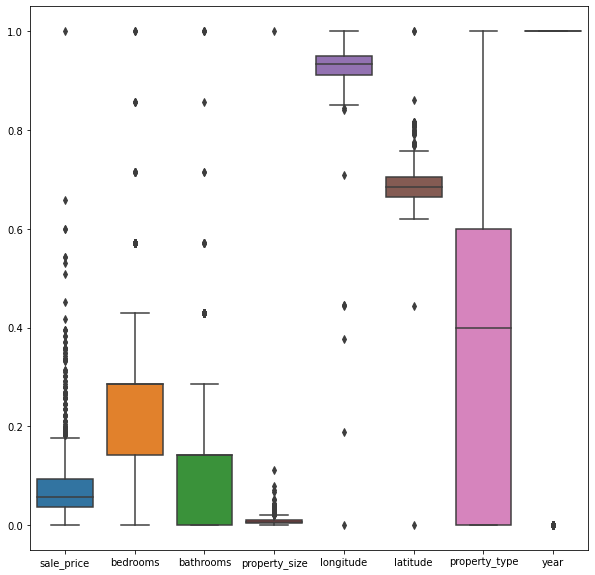

In [187]:
plt.figure(figsize=(10,10))
sns.boxplot(data=dfmmn)
plt.show()

A simple scatter plot give us an idea how spread low and high prices are.

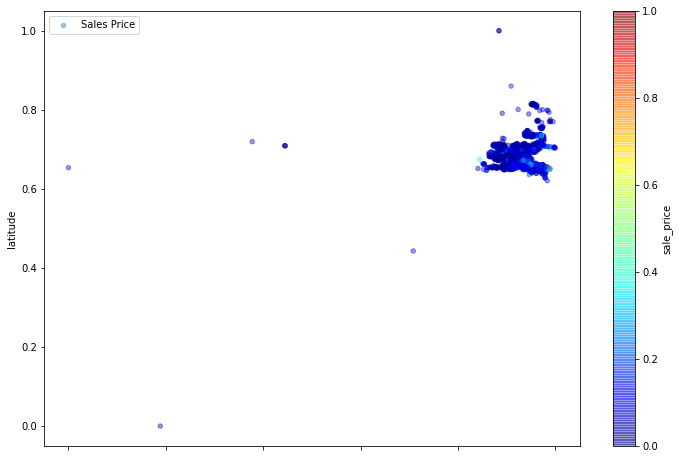

In [188]:
dfmmn.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='Sales Price',
figsize=(12, 8), c='sale_price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

# Machine Learning

## Training Model

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import r2_score

Before we start training our model it is important to define the predictors and who is the label (target). The predictors are the attributes that we expect to influence the prediction that is our label.

In [190]:
predictors = ['bedrooms', 'bathrooms', 'property_size', 'longitude', 'latitude', 'property_type', 'year']
label = 'sale_price'

In [191]:
X_train, X_test, y_train, y_test = train_test_split(dublin[predictors], dublin[label], test_size=0.13, random_state=0)
Xy_test = pd.concat([X_test, y_test], axis=1)

### Linear Regression

The first model we will use is the Linear Regression. It is not the best model; however, linear regression is relatively fast and easy to implement.

In [192]:
plm = LinearRegression()

plm.fit(X_train, y_train)

y_pred = plm.predict(X_test)
#accuracy = plm.score(X_test, y_test)

r2_score_plm = r2_score(y_test, y_pred)
print("r2 Test score:", r2_score_plm)

testRMSE_plm = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("Test RMSE:", testRMSE_plm)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_plm = cross_val_score(plm, X_train, y_train, cv=kfold ).mean()
print("K-fold CV average score: %.2f" % kf_cv_scores_plm)

r2 Test score: 0.4316972979846405
Test RMSE: 170280.3744157157
K-fold CV average score: -0.87


### K-Neighbor Regressor

In [193]:
knn_model = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(5, 500, 5)}
gsModelTrain = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv=2)
gsModelTrain.fit(X_train, y_train)
knn_model.set_params(**gsModelTrain.best_params_)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

r2_score_knn = r2_score(y_test, y_pred)
print("r2 Test score:", r2_score_knn)

testRMSE_knn = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("Test RMSE:", testRMSE_knn)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold ).mean()
print("K-fold CV average score: %.2f" % kf_cv_scores_knn)

r2 Test score: 0.17017365513455585
Test RMSE: 205763.50314125422
K-fold CV average score: 0.36


### Gradient Boosting Regressor

In [194]:
clf = ensemble.GradientBoostingRegressor(n_estimators=2000, learning_rate=0.01, max_depth=1, random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# print("Score: ", clf.score(X_test, y_test))

r2_score_clf = r2_score(y_test, y_pred)
print("r2 Test score:", r2_score_clf)

testRMSE_clf = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("Test RMSE:", testRMSE_clf)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_clf = cross_val_score(clf, X_train, y_train, cv=kfold ).mean()
print("K-fold CV average score: %.2f" % kf_cv_scores_clf)

r2 Test score: 0.5582987016109744
Test RMSE: 150120.17911610054
K-fold CV average score: 0.56


### XGB Regressor

In [195]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=1)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
# print("\nScore: ", xgb.score(X_test, y_test))

r2_score_xgb = r2_score(y_test, y_pred)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=kfold ).mean()

testRMSE_xgb = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

print("r2 Test score:", r2_score_xgb)
print("Test RMSE:", testRMSE_xgb)
print("K-fold CV average score: %.2f" % kf_cv_scores_xgb)

[11:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Random Forest Regressor

Our second model is a Random Forest Regressor, which has better accuracy and should be the one for the project.

In [196]:
rfr = RandomForestRegressor(n_estimators=2000, max_depth=6, random_state=1, oob_score=True)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# print("Score: ", rfr.score(X_test, y_test))

r2_score_rfr = r2_score(y_test, y_pred)
print("r2 Test score:", r2_score_rfr)

testRMSE_rfr = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print("Test RMSE:", testRMSE_rfr)

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_rfr = cross_val_score(rfr, X_train, y_train, cv=kfold ).mean()
print("K-fold CV average score: %.2f" % kf_cv_scores_rfr)

r2 Test score: 0.6435030220355173
Test RMSE: 134866.05757255954
K-fold CV average score: 0.64


In [197]:
model_results = pd.DataFrame({
    "Model Name": ["Linear Regression", "K-Neighbors Regressor", "Gradient Boosting Regressor", "XGB Regressor", "Random Forest Regressor"],
    "R2 Score": [r2_score_plm, r2_score_knn, r2_score_clf, r2_score_xgb, r2_score_rfr],
    "RMSE": [testRMSE_plm, testRMSE_knn, testRMSE_clf, testRMSE_xgb, testRMSE_rfr],
    "KFold Score": [kf_cv_scores_plm, kf_cv_scores_knn, kf_cv_scores_clf, kf_cv_scores_xgb, kf_cv_scores_rfr]
})

model_results

,Model Name,R2 Score,RMSE,KFold Score
0,Linear Regression,0.431697,170280.374416,-0.867167
1,K-Neighbors Regressor,0.170174,205763.503141,0.360612
2,Gradient Boosting Regressor,0.558299,150120.179116,0.562092
3,XGB Regressor,0.547649,151919.165346,0.587185
4,Random Forest Regressor,0.643503,134866.057573,0.643437
